In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# Extract Crytocurrency Data

In [3]:
cryptocurrencies = ['BTC-USD', 'ETH-USD']

In [6]:
data = yf.download(cryptocurrencies, start='2022-02-01', end='2024-02-23')
data.head()

[*********************100%%**********************]  2 of 2 completed


Adj Close                      Close               \
                 BTC-USD      ETH-USD       BTC-USD      ETH-USD   
Date                                                               
2022-02-01  38743.273438  2792.117188  38743.273438  2792.117188   
2022-02-02  36952.984375  2682.854004  36952.984375  2682.854004   
2022-02-03  37154.601562  2679.162598  37154.601562  2679.162598   
2022-02-04  41500.875000  2983.586914  41500.875000  2983.586914   
2022-02-05  41441.164062  3014.648193  41441.164062  3014.648193   

                    High                        Low               \
                 BTC-USD      ETH-USD       BTC-USD      ETH-USD   
Date                                                               
2022-02-01  39115.132812  2802.315430  38113.664062  2682.621826   
2022-02-02  38834.617188  2802.212158  36832.730469  2630.120361   
2022-02-03  37154.601562  2712.482666  36375.539062  2587.783447   
2022-02-04  41527.785156  2983.586914  37093.628906  2675.443848   
2022-02-05  41847.164062  3054.130127  41038.097656  2966.781006   

                    Open                    Volume               
                 BTC-USD      ETH-USD      BTC-USD      ETH-USD  
Date                                                             
2022-02-01  38481.765625  2687.898926  20288500328  13194846235  
2022-02-02  38743.714844  2791.958984  19155189416  13876301217  
2022-02-03  36944.804688  2682.226074  18591534769  12755505065  
2022-02-04  37149.265625  2681.057617  29412210792  18987223729  
2022-02-05  41501.480469  2984.446045  19652846215  13102093957

In [7]:
data.isnull().any()

Adj Close  BTC-USD    False
           ETH-USD    False
Close      BTC-USD    False
           ETH-USD    False
High       BTC-USD    False
           ETH-USD    False
Low        BTC-USD    False
           ETH-USD    False
Open       BTC-USD    False
           ETH-USD    False
Volume     BTC-USD    False
           ETH-USD    False
dtype: bool

In [8]:
adj_close=data['Adj Close']

bitcoin_prices = adj_close['BTC-USD']
print(bitcoin_prices.head())
ethereum_prices = adj_close['ETH-USD']
print(ethereum_prices.head())

Date
2022-02-01    38743.273438
2022-02-02    36952.984375
2022-02-03    37154.601562
2022-02-04    41500.875000
2022-02-05    41441.164062
Name: BTC-USD, dtype: float64
Date
2022-02-01    2792.117188
2022-02-02    2682.854004
2022-02-03    2679.162598
2022-02-04    2983.586914
2022-02-05    3014.648193
Name: ETH-USD, dtype: float64


In [9]:
len(adj_close.index)

752

In [135]:
crypto2018 = adj_close[0:365]
crypto2019 = adj_close[365:730]
crypto2020 = adj_close[730:1096]
crypto2021 = adj_close[1096:1461]
crypto2022 = adj_close[1461:1826]
crypto2023 = adj_close[1826:2191]
crypto2024 = adj_close[2191:2244]

# Adjusted Closing Price

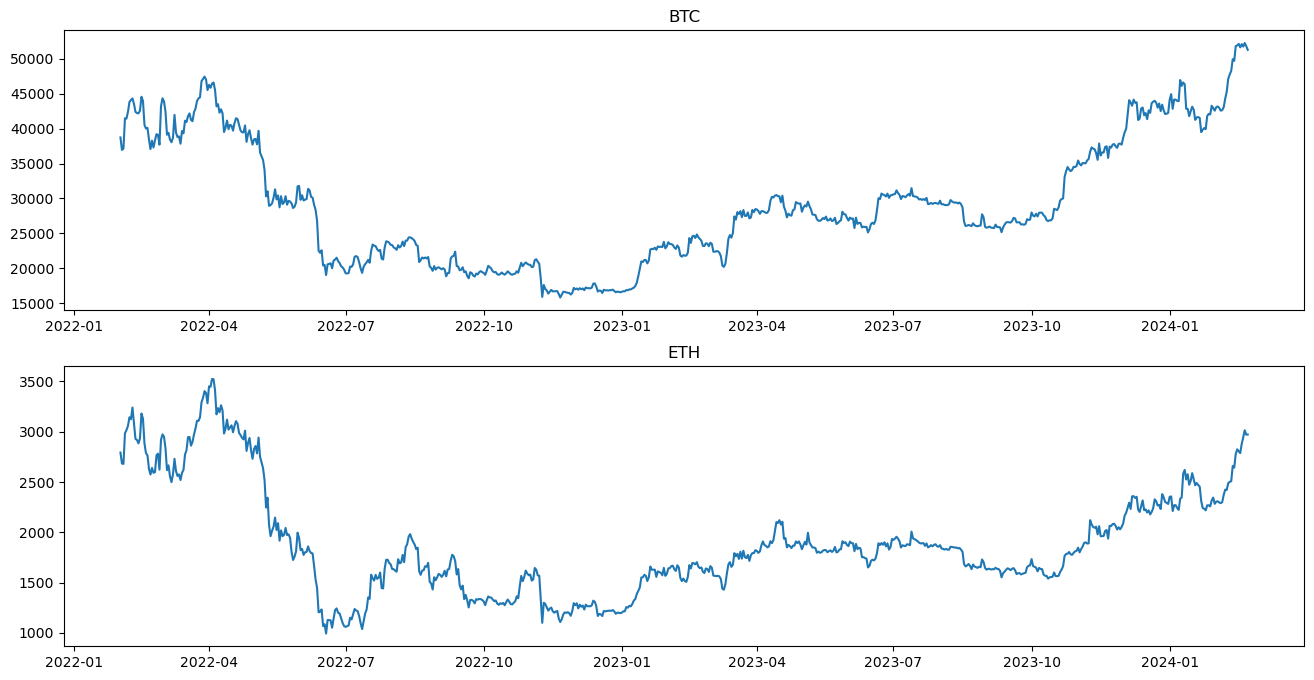

In [10]:
fig, axs =plt.subplots(2,figsize=(16,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0].plot(adj_close['BTC-USD'])
axs[0].set_title('BTC')
axs[1].plot(adj_close['ETH-USD'])
axs[1].set_title('ETH')
plt.show()

# Moving Average

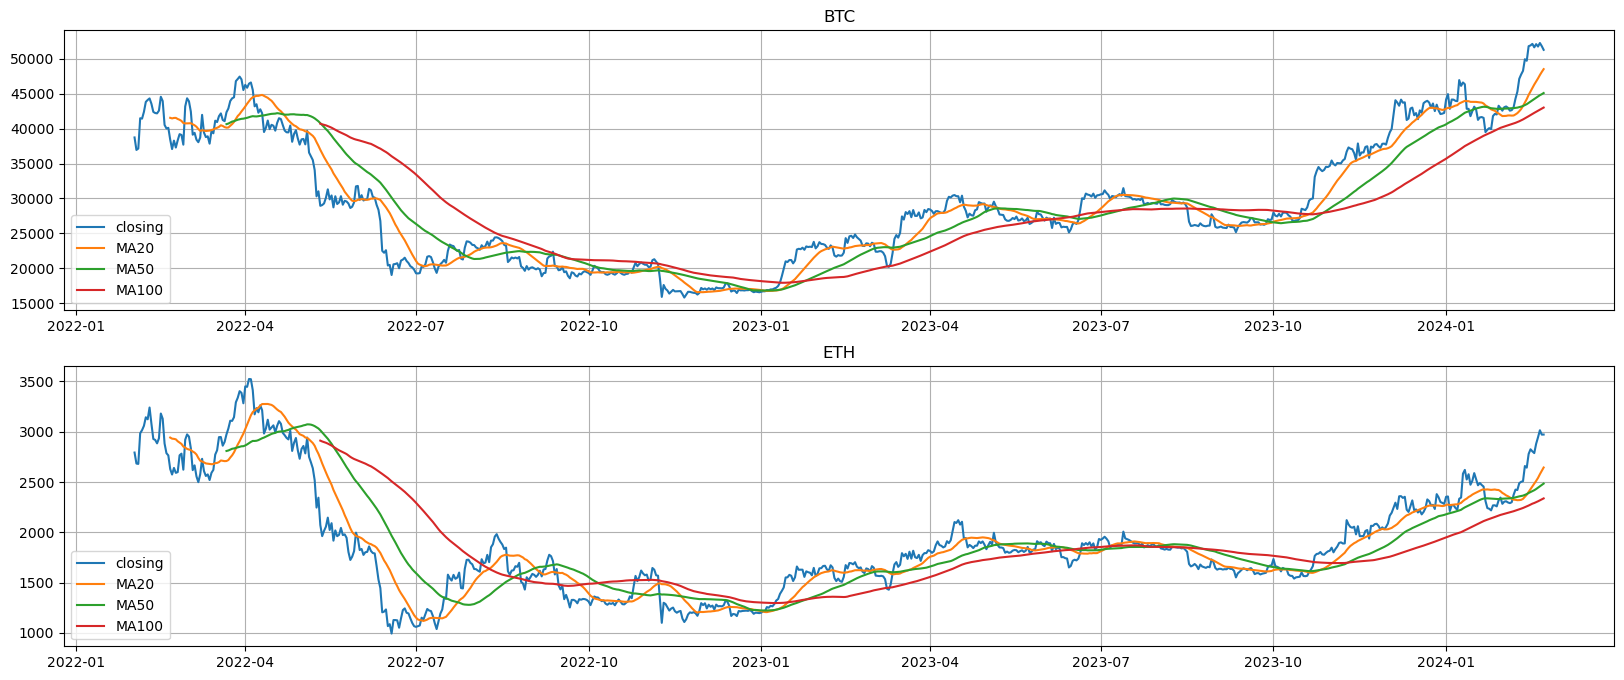

In [11]:
MA20 = adj_close.rolling(20).mean()
MA50 = adj_close.rolling(50).mean()
MA100 = adj_close.rolling(100).mean()

fig, axs = plt.subplots(2,figsize=(20,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0].plot(adj_close['BTC-USD'], label= 'closing')
axs[0].plot(MA20['BTC-USD'], label= 'MA20')
axs[0].plot(MA50['BTC-USD'], label= 'MA50')
axs[0].plot(MA100['BTC-USD'], label= 'MA100')
axs[0].set_title('BTC')
axs[0].legend()
axs[0].grid(True)
axs[1].plot(adj_close['ETH-USD'], label= 'closing')
axs[1].plot(MA20['ETH-USD'], label= 'MA20')
axs[1].plot(MA50['ETH-USD'], label= 'MA50')
axs[1].plot(MA100['ETH-USD'], label= 'MA100')
axs[1].set_title('ETH')
axs[1].legend()
plt.grid(True)
plt.show()

# CDC Action Zone

In [192]:
EMA50 = adj_close.rolling(window = 50, min_periods = 1).mean()
EMA200 = adj_close.rolling(window = 200, min_periods = 1).mean()

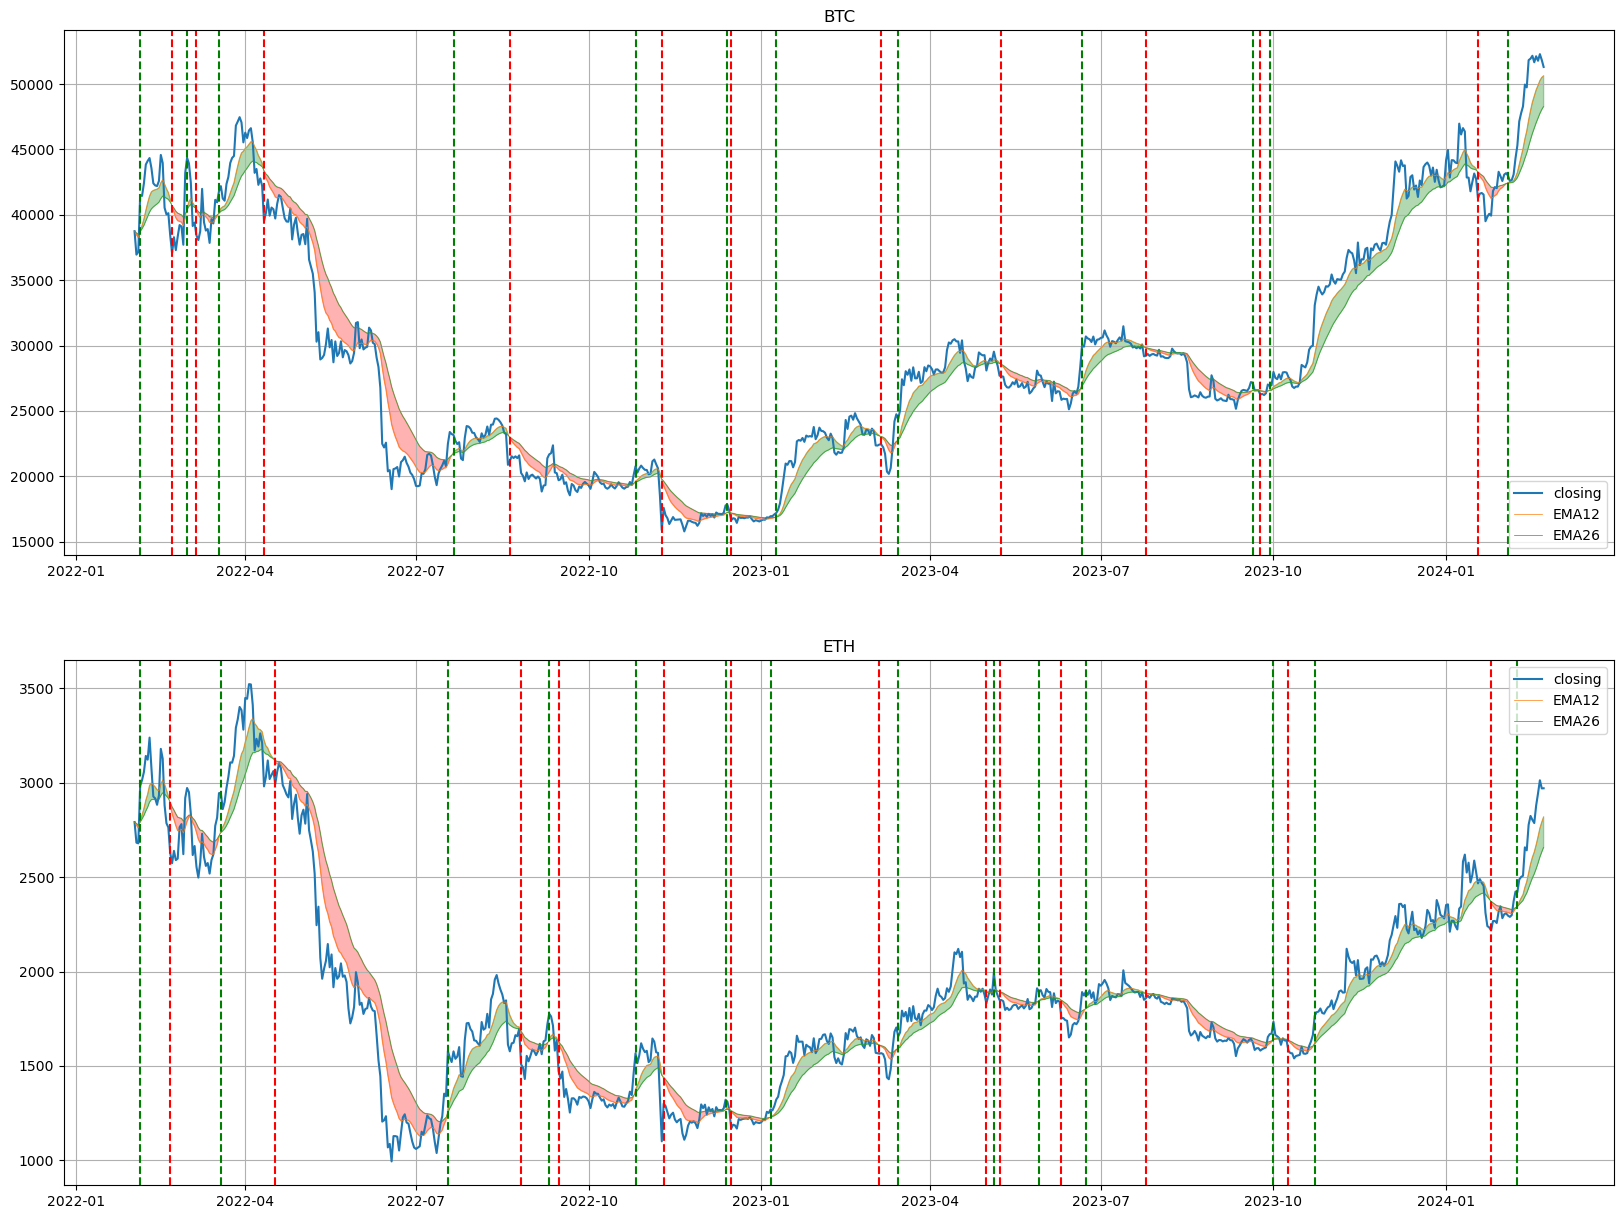

In [16]:
fig, axs = plt.subplots(2,figsize=(20,15),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0].plot(adj_close['BTC-USD'], label= 'closing')
axs[0].plot(EMA12['BTC-USD'], label= 'EMA12', linewidth = 0.5)
axs[0].plot(EMA26['BTC-USD'], label= 'EMA26', linewidth = 0.5)
axs[0].set_title('BTC')
axs[0].legend()
axs[0].grid(True)
axs[0].fill_between(adj_close.index, EMA12['BTC-USD'], EMA26['BTC-USD'], where=(EMA12['BTC-USD'] > EMA26['BTC-USD']), color='green', alpha=0.3)
axs[0].fill_between(adj_close.index, EMA12['BTC-USD'], EMA26['BTC-USD'], where=(EMA12['BTC-USD'] <= EMA26['BTC-USD']), color='red', alpha=0.3)

for buying in btc_buying:
    axs[0].axvline(x=EMA12.index[buying], color='g', linestyle='--')

for selling in btc_selling:
    axs[0].axvline(x=EMA12.index[selling], color='r', linestyle='--')
    
axs[1].plot(adj_close['ETH-USD'], label= 'closing')
axs[1].plot(EMA12['ETH-USD'], label= 'EMA12', linewidth = 0.5)
axs[1].plot(EMA26['ETH-USD'], label= 'EMA26', linewidth = 0.5)
axs[1].set_title('ETH')
axs[1].legend()
plt.grid(True)
axs[1].fill_between(adj_close.index, EMA12['ETH-USD'], EMA26['ETH-USD'], where=(EMA12['ETH-USD'] > EMA26['ETH-USD']), color='green', alpha=0.3)
axs[1].fill_between(adj_close.index, EMA12['ETH-USD'], EMA26['ETH-USD'], where=(EMA12['ETH-USD'] <= EMA26['ETH-USD']), color='red', alpha=0.3)

for buying in eth_buying:
    axs[1].axvline(x=EMA12.index[buying], color='g', linestyle='--')

for selling in eth_selling:
    axs[1].axvline(x=EMA12.index[selling], color='r', linestyle='--')

plt.show()

In [22]:
time_interval = (EMA12.index[1] - EMA12.index[0]).total_seconds()

slope_ema12_btc = (EMA12['BTC-USD'].diff() / time_interval).rename('Slope_EMA12_BTC')
slope_ema26_btc = (EMA26['BTC-USD'].diff() / time_interval).rename('Slope_EMA26_BTC')

slope_ema12_eth = (EMA12['ETH-USD'].diff() / time_interval).rename('Slope_EMA12_ETH')
slope_ema26_eth = (EMA26['ETH-USD'].diff() / time_interval).rename('Slope_EMA26_ETH')

slope_diff_btc = slope_ema12_btc - slope_ema26_btc
slope_diff_eth = slope_ema12_eth - slope_ema26_eth

slope_df = pd.concat([slope_diff_btc.rename('BTC'), slope_diff_eth.rename('ETH')], axis=1)

print(slope_df)

                 BTC       ETH
Date                          
2022-02-01       NaN       NaN
2022-02-02 -0.001653 -0.000101
2022-02-03 -0.001090 -0.000081
2022-02-04  0.003190  0.000219
2022-02-05  0.002439  0.000200
...              ...       ...
2024-02-18  0.000698  0.000128
2024-02-19 -0.000103  0.000143
2024-02-20  0.000054  0.000158
2024-02-21 -0.000702  0.000064
2024-02-22 -0.001368  0.000030

[752 rows x 2 columns]


In [193]:
btc_crossings_50_200 = np.where(np.logical_xor(EMA50['BTC-USD'] > EMA200['BTC-USD'], EMA50['BTC-USD'].shift(1) > EMA200['BTC-USD'].shift(1)))[0]
#eth_crossings = np.where(np.logical_xor(EMA50['ETH-USD'] > EMA200['ETH-USD'], EMA50['ETH-USD'].shift(1) > EMA200['ETH-USD'].shift(1)))[0]

btc_buying_50_200 = np.where((EMA50['BTC-USD'] > EMA200['BTC-USD']) & (EMA50['BTC-USD'].shift(1) <= EMA200['BTC-USD'].shift(1)))[0]
btc_selling_50_200 = np.where((EMA50['BTC-USD'] <= EMA200['BTC-USD']) & (EMA50['BTC-USD'].shift(1) > EMA200['BTC-USD'].shift(1)))[0]

#eth_buying = np.where((EMA50['ETH-USD'] > EMA200['ETH-USD']) & (EMA50['ETH-USD'].shift(1) <= EMA200['ETH-USD'].shift(1)))[0]
#eth_selling = np.where((EMA50['ETH-USD'] <= EMA200['ETH-USD']) & (EMA50['ETH-USD'].shift(1) > EMA200['ETH-USD'].shift(1)))[0]

In [195]:
print(btc_buying_50_200, btc_selling_50_200)

[ 50  67 371 636] [ 64 100 588]


In [196]:
btc_selling_50_200 = list(btc_selling_50_200)
btc_selling_50_200.insert(0, 0)
btc_selling_50_200.append(-1)
btc_buying_50_200 = list(btc_buying)

In [197]:
print(btc_buying_50_200, btc_selling_50_200)

[50, 67, 371, 636] [0, 64, 100, 588, -1]


In [111]:
for i in range(len(EMA12)):
    print(EMA12[i], EMA26[i])

KeyError: 0

In [106]:
btc_buying = btc_buying[0:-2]

In [24]:
slope_price = pd.concat([slope_df, bitcoin_prices], axis = 1)
slope_price

,BTC,ETH,BTC-USD
Date,,,
2022-02-01,NaN,NaN,38743.273438
2022-02-02,-0.001653,-0.000101,36952.984375
2022-02-03,-0.001090,-0.000081,37154.601562
2022-02-04,0.003190,0.000219,41500.875000
2022-02-05,0.002439,0.000200,41441.164062
...,...,...,...
2024-02-18,0.000698,0.000128,52122.546875
2024-02-19,-0.000103,0.000143,51779.144531
2024-02-20,0.000054,0.000158,52284.875000


In [25]:
for i in range(len(btc_selling)):
    print(slope_price.iloc[btc_buying[i]:btc_selling[i]])

                 BTC       ETH       BTC-USD
Date                                        
2022-02-04  0.003190  0.000219  41500.875000
2022-02-05  0.002439  0.000200  41441.164062
2022-02-06  0.002775  0.000194  42412.433594
2022-02-07  0.003428  0.000225  43840.285156
2022-02-08  0.002839  0.000151  44118.445312
2022-02-09  0.002292  0.000217  44338.796875
2022-02-10  0.000919  0.000009  43565.113281
2022-02-11 -0.000521 -0.000144  42407.937500
2022-02-12 -0.000726 -0.000132  42244.468750
2022-02-13 -0.000770 -0.000143  42197.515625
2022-02-14 -0.000393 -0.000073  42586.917969
2022-02-15  0.001382  0.000164  44575.203125
2022-02-16  0.000356  0.000072  43961.859375
2022-02-17 -0.003047 -0.000180  40538.011719
2022-02-18 -0.002986 -0.000236  40030.976562
2022-02-19 -0.002351 -0.000209  40122.156250
2022-02-20 -0.003472 -0.000290  38431.378906
                 BTC       ETH       BTC-USD
Date                                        
2022-03-01  0.004457  0.000232  44354.636719
2022-03-02

In [27]:
slope_btc = slope_price.copy()

In [29]:
slope_btc = slope_btc.drop(['ETH'], axis = 1)

In [45]:
print(slope_btc)

                 BTC       BTC-USD
Date                              
2022-02-01       NaN  38743.273438
2022-02-02 -0.001653  36952.984375
2022-02-03 -0.001090  37154.601562
2022-02-04  0.003190  41500.875000
2022-02-05  0.002439  41441.164062
...              ...           ...
2024-02-18  0.000698  52122.546875
2024-02-19 -0.000103  51779.144531
2024-02-20  0.000054  52284.875000
2024-02-21 -0.000702  51839.179688
2024-02-22 -0.001368  51304.972656

[752 rows x 2 columns]


In [67]:
buying = []
selling = []
prev = slope_btc.iloc[1]['BTC']
curr = 0

for i in range(2,len(slope_btc)):
    curr = slope_btc.iloc[i]['BTC']
    if (prev >0 and curr <0):
        buying.append(i)
    elif (prev<0 and curr >0):
        selling.append(i)
    prev = curr

selling = selling[1:-1]
buying = buying[0:-3]

In [69]:
print(buying, selling)

[10, 16, 26, 31, 37, 58, 79, 84, 87, 91, 93, 106, 129, 160, 174, 182, 186, 189, 195, 217, 224, 229, 235, 243, 248, 255, 260, 274, 279, 292, 318, 323, 325, 329, 357, 359, 363, 386, 416, 419, 422, 424, 439, 454, 457, 459, 471, 474, 477, 485, 489, 491, 512, 514, 518, 528, 547, 558, 560, 576, 587, 600, 615, 639, 649, 653, 678, 690, 701, 704] [14, 24, 27, 36, 41, 76, 83, 86, 90, 92, 103, 107, 140, 162, 176, 185, 188, 190, 212, 219, 228, 233, 237, 244, 254, 257, 262, 276, 290, 294, 322, 324, 326, 334, 358, 362, 379, 404, 418, 421, 423, 433, 450, 456, 458, 470, 473, 475, 479, 486, 490, 500, 513, 517, 527, 546, 552, 559, 571, 579, 588, 604, 622, 646, 652, 668, 687, 699, 702, 706, 724]


In [70]:
for i in range(len(buying)):
    print('buying in ', buying[i], slope_btc.iloc[buying[i]]['BTC-USD'], ', selling in ', selling[i], slope_btc.iloc[selling[i]]['BTC-USD'])

buying in  10 42407.9375 , selling in  14 44575.203125
buying in  16 40538.01171875 , selling in  24 39214.21875
buying in  26 37709.78515625 , selling in  27 43193.234375
buying in  31 39137.60546875 , selling in  36 41982.92578125
buying in  37 39437.4609375 , selling in  41 39666.75390625
buying in  58 45538.67578125 , selling in  76 40826.21484375
buying in  79 40527.36328125 , selling in  83 40458.30859375
buying in  84 38117.4609375 , selling in  86 39773.828125
buying in  87 38609.82421875 , selling in  90 38529.328125
buying in  91 37750.453125 , selling in  92 39698.37109375
buying in  93 36575.140625 , selling in  103 31305.11328125
buying in  106 28720.271484375 , selling in  107 30314.333984375
buying in  129 29083.8046875 , selling in  140 20710.59765625
buying in  160 19970.556640625 , selling in  162 20212.07421875
buying in  174 21361.701171875 , selling in  176 22930.548828125
buying in  182 22978.1171875 , selling in  185 23289.314453125
buying in  186 22961.279296875

In [108]:
def profit_calc(buying, selling, slope_btc):
    seed = 1000000
    btc = 0
    coins = 0
    buy_price = 0
    sell_price = 0
    short_start_price = 0
    short_end_price = 0
    
    for i in range(len(buying)):
        
        buy_price = slope_btc.iloc[buying[i]]['BTC-USD']
        coins = seed/buy_price
        btc += coins
        seed -= buy_price*coins
        
        print('buying at ', buying[i], buy_price, '. current seed: ', seed, ', current btc: ', btc)
        
        sell_price = slope_btc.iloc[selling[i]]['BTC-USD']
        seed += sell_price*btc
        btc = 0
        
        print('selling at ', selling[i], sell_price, '. current seed: ', seed, ', current btc: ', btc)
        '''
        if (i != len(buying)-1):
            short_start_price = slope_btc.iloc[selling[i]]['BTC-USD']
            coins = 1000000/short_start_price
            btc -= coins
            seed += 1000000
            
            print('shorting start at ', selling[i], short_start_price, '. current seed: ', seed, ', current btc: ', btc)
            
            short_end_price = slope_btc.iloc[buying[i+1]]['BTC-USD']
            seed -= short_end_price*abs(btc)
            btc = 0
            
            print('shorting end at ', buying[i+1], short_end_price, '. current seed: ', seed, ', current btc: ', btc)
        '''
    return ((seed-1000000)/1000000) *100

In [109]:
profit_calc(buying, selling, slope_btc)

buying at  10 42407.9375 . current seed:  0.0 , current btc:  23.580491270059998
selling at  14 44575.203125 . current seed:  1051105.1881502136 , current btc:  0
shorting start at  14 44575.203125 . current seed:  2051105.1881502136 , current btc:  -22.433997601665443
shorting end at  16 40538.01171875 . current seed:  1141675.5304754905 , current btc:  0
buying at  16 40538.01171875 . current seed:  0.0 , current btc:  28.163086497590424
selling at  24 39214.21875 . current seed:  1104393.4345916822 , current btc:  0
shorting start at  24 39214.21875 . current seed:  2104393.434591682 , current btc:  -25.500954293523954
shorting end at  26 37709.78515625 . current seed:  1142757.9269035428 , current btc:  0
buying at  26 37709.78515625 . current seed:  0.0 , current btc:  30.30401584545073
selling at  27 43193.234375 . current seed:  1308928.4589162671 , current btc:  0
shorting start at  27 43193.234375 . current seed:  2308928.4589162674 , current btc:  -23.1517739865944
shorting e

-13.687913377546765

In [151]:
profit_calc(btc_buying, btc_selling, slope_btc)

buying at  50 42892.95703125 . current seed:  -1.1641532182693481e-10 , current btc:  23.313850786072926
selling at  0 38743.2734375 . current seed:  903254.8958858976 , current btc:  0
shorting start at  0 38743.2734375 . current seed:  1903254.8958858976 , current btc:  -25.810932099301915
shorting end at  67 42782.13671875 . current seed:  799008.0699751901 , current btc:  0
buying at  67 42782.13671875 . current seed:  0.0 , current btc:  18.67620767115662
selling at  64 43206.73828125 . current seed:  806938.0169339377 , current btc:  0
shorting start at  64 43206.73828125 . current seed:  1806938.0169339376 , current btc:  -23.144538092428977
shorting end at  371 23264.291015625 . current seed:  1268496.7473294516 , current btc:  0
buying at  371 23264.291015625 . current seed:  0.0 , current btc:  54.52548485047281
selling at  100 29047.751953125 . current seed:  1583842.7590604092 , current btc:  0
shorting start at  100 29047.751953125 . current seed:  2583842.759060409 , curr

4.528919072762911

In [ ]:
scen_buy = [0]
scen_sell = [371]

In [162]:
slope_price.iloc[636]

BTC            0.000293
ETH            0.000034
BTC-USD    34502.363281
Name: 2023-10-30 00:00:00, dtype: float64

In [157]:
seed = 1000000
btc = 0
coins = 0

short_start_price = slope_btc.iloc[0]['BTC-USD']
coins = 1000000/short_start_price
btc -= coins
seed += 1000000
            
print('shorting start at ', 0, short_start_price, '. current seed: ', seed, ', current btc: ', btc)
            
short_end_price = slope_btc.iloc[371]['BTC-USD']
seed -= short_end_price*abs(btc)
btc = 0
            
print('shorting end at ', 371, short_end_price, '. current seed: ', seed, ', current btc: ', btc)

buy_price = slope_btc.iloc[371]['BTC-USD']
coins = seed/buy_price
btc += coins
seed -= buy_price*coins
        
print('buying at ', 371, buy_price, '. current seed: ', seed, ', current btc: ', btc)
        
sell_price = slope_btc.iloc[589]['BTC-USD']
seed += sell_price*btc
btc = 0
        
print('selling at ', 589, sell_price, '. current seed: ', seed, ', current btc: ', btc)

shorting start at  0 38743.2734375 . current seed:  2000000 , current btc:  -25.810932099301915
shorting end at  371 23264.291015625 . current seed:  1399526.9642573036 , current btc:  0
buying at  371 23264.291015625 . current seed:  0.0 , current btc:  60.157731147591775
selling at  589 26228.32421875 . current seed:  1577836.4768034327 , current btc:  0


In [158]:
157/139

1.129496402877698

In [163]:
seed = 1000000
btc = 0
coins = 0

buy_price = slope_btc.iloc[636]['BTC-USD']
coins = seed/buy_price
btc += coins
seed -= buy_price*coins
        
print('buying at ', 636, buy_price, '. current seed: ', seed, ', current btc: ', btc)
        
sell_price = slope_btc.iloc[-1]['BTC-USD']
seed += sell_price*btc
btc = 0
        
print('selling at ', -1, sell_price, '. current seed: ', seed, ', current btc: ', btc)

buying at  636 34502.36328125 . current seed:  0.0 , current btc:  28.983521848876972
selling at  -1 51304.97265625 . current seed:  1486998.7959384576 , current btc:  0


In [198]:
print(btc_buying_50_200, btc_selling_50_200)

[50, 67, 371, 636] [0, 64, 100, 588, -1]


In [188]:
def profit_calc_new(buying, selling, slope_btc):
    seed = 1000000
    btc = 0
    coins = 0
    buy_price = 0
    sell_price = 0
    short_start_price = 0
    short_end_price = 0
    
    for i in range(len(buying)):
        
        short_start_price = slope_btc.iloc[selling[i]]['BTC-USD']
        coins = 1000000/short_start_price
        btc -= coins
        seed += 1000000
            
        print('shorting start at ', selling[i], short_start_price, '. current seed: ', seed, ', current btc: ', btc)
            
        short_end_price = slope_btc.iloc[buying[i]]['BTC-USD']
        seed -= short_end_price*abs(btc)
        btc = 0
            
        print('shorting end at ', buying[i], short_end_price, '. current seed: ', seed, ', current btc: ', btc)
        
        buy_price = slope_btc.iloc[buying[i]]['BTC-USD']
        coins = seed/buy_price
        btc += coins
        seed -= buy_price*coins
        
        print('buying at ', buying[i], buy_price, '. current seed: ', seed, ', current btc: ', btc)
        
        sell_price = slope_btc.iloc[selling[i+1]]['BTC-USD']
        seed += sell_price*btc
        btc = 0
        
        print('selling at ', selling[i], sell_price, '. current seed: ', seed, ', current btc: ', btc)
        
        
    return ((seed-1000000)/1000000) *100

In [189]:
profit_calc_new(btc_buying_50_200, btc_selling_50_200, slope_btc)

shorting start at  0 38743.2734375 . current seed:  2000000 , current btc:  -25.810932099301915
shorting end at  50 42892.95703125 . current seed:  892892.7985281316 , current btc:  0
buying at  50 42892.95703125 . current seed:  0.0 , current btc:  20.816769472843934
selling at  0 43206.73828125 . current seed:  899424.7104742824 , current btc:  0
shorting start at  64 43206.73828125 . current seed:  1899424.7104742825 , current btc:  -23.144538092428977
shorting end at  67 42782.13671875 . current seed:  909251.9175116686 , current btc:  0
buying at  67 42782.13671875 . current seed:  0.0 , current btc:  21.2530739988303
selling at  64 29047.751953125 . current seed:  617354.021759433 , current btc:  0
shorting start at  100 29047.751953125 . current seed:  1617354.021759433 , current btc:  -34.426071993926485
shorting end at  371 23264.291015625 . current seed:  816455.8643678697 , current btc:  0
buying at  371 23264.291015625 . current seed:  1.1641532182693481e-10 , current btc: 

-15.086202654813729